In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [3]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [4]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
from datetime import datetime
import time

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0498ac92601ffcb50b3a64830b1b8375


In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nome
Processing Record 2 of Set 1 | saint augustine
Processing Record 3 of Set 1 | nouakchott
Processing Record 4 of Set 1 | ngama
Processing Record 5 of Set 1 | beloha
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | la rioja
Processing Record 8 of Set 1 | bengkulu
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | panaba
Processing Record 11 of Set 1 | esperance
Processing Record 12 of Set 1 | talaya
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | namatanai
Processing Record 17 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | brae
Processing Record 22 of Set 1 | yellowknife
Processing Record 23 

Processing Record 39 of Set 4 | yagodnoye
Processing Record 40 of Set 4 | faanui
Processing Record 41 of Set 4 | torbay
Processing Record 42 of Set 4 | pithapuram
Processing Record 43 of Set 4 | grimari
City not found. Skipping...
Processing Record 44 of Set 4 | san cristobal
Processing Record 45 of Set 4 | thompson
Processing Record 46 of Set 4 | tubruq
City not found. Skipping...
Processing Record 47 of Set 4 | saskylakh
Processing Record 48 of Set 4 | didsbury
Processing Record 49 of Set 4 | grand gaube
Processing Record 50 of Set 4 | ballina
Processing Record 1 of Set 5 | vardo
Processing Record 2 of Set 5 | chake chake
Processing Record 3 of Set 5 | oussouye
Processing Record 4 of Set 5 | najran
Processing Record 5 of Set 5 | sompeta
Processing Record 6 of Set 5 | olafsvik
Processing Record 7 of Set 5 | geraldton
Processing Record 8 of Set 5 | iztapa
Processing Record 9 of Set 5 | ambunti
Processing Record 10 of Set 5 | hilo
Processing Record 11 of Set 5 | alta floresta
Processing

Processing Record 30 of Set 8 | bowen
Processing Record 31 of Set 8 | necochea
Processing Record 32 of Set 8 | bad homburg
Processing Record 33 of Set 8 | hamilton
Processing Record 34 of Set 8 | zemio
Processing Record 35 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 36 of Set 8 | sainte-marie
Processing Record 37 of Set 8 | koslan
Processing Record 38 of Set 8 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 39 of Set 8 | ereymentau
Processing Record 40 of Set 8 | sitrah
Processing Record 41 of Set 8 | pochutla
Processing Record 42 of Set 8 | luchenza
Processing Record 43 of Set 8 | kambove
Processing Record 44 of Set 8 | khani
Processing Record 45 of Set 8 | caraquet
Processing Record 46 of Set 8 | ugoofaaru
Processing Record 47 of Set 8 | boyolangu
Processing Record 48 of Set 8 | emerald
Processing Record 49 of Set 8 | saint anthony
Processing Record 50 of Set 8 | san policarpo
Processing Record 1 of Set 9 | haines junction
Processing Record 2

Processing Record 18 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 19 of Set 12 | hue
Processing Record 20 of Set 12 | toliary
City not found. Skipping...
Processing Record 21 of Set 12 | abu jubayhah
City not found. Skipping...
Processing Record 22 of Set 12 | olinda
Processing Record 23 of Set 12 | corrales
Processing Record 24 of Set 12 | jinchang
Processing Record 25 of Set 12 | gornyak
Processing Record 26 of Set 12 | dera din panah
City not found. Skipping...
Processing Record 27 of Set 12 | mazagao
Processing Record 28 of Set 12 | simao
Processing Record 29 of Set 12 | lavrentiya
Processing Record 30 of Set 12 | moyale
Processing Record 31 of Set 12 | ossora
Processing Record 32 of Set 12 | fairbanks
Processing Record 33 of Set 12 | orange
Processing Record 34 of Set 12 | husavik
Processing Record 35 of Set 12 | tual
Processing Record 36 of Set 12 | nianzishan
Processing Record 37 of Set 12 | agirish
Processing Record 38 of Set 12 | sukhoy log
Processing Rec

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nome,64.50,-165.41,30.99,100,90,9.17,US,2020-04-15 12:54:56
1,Saint Augustine,29.89,-81.31,77.00,94,75,9.17,US,2020-04-15 12:53:50
2,Nouakchott,18.09,-15.98,74.12,40,39,14.56,MR,2020-04-15 12:54:57
3,Ngama,11.78,17.17,107.83,6,0,11.07,TD,2020-04-15 12:54:58
4,Beloha,-25.17,45.05,93.85,27,0,5.39,MG,2020-04-15 12:54:58
5,Hithadhoo,-0.60,73.08,85.23,66,9,3.60,MV,2020-04-15 12:54:59
6,La Rioja,42.25,-2.50,60.80,67,75,17.22,ES,2020-04-15 12:54:59
7,Bengkulu,-3.80,102.27,81.05,77,100,0.34,ID,2020-04-15 12:55:00
8,Butaritari,3.07,172.79,83.73,79,91,17.31,KI,2020-04-15 12:55:00
9,Panaba,21.28,-88.27,71.20,97,73,5.68,MX,2020-04-15 12:55:01


In [11]:
# City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed,
new_data_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_data_order]

In [12]:
# Create the output file (CSV).
output_data_file = "weather_data\cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

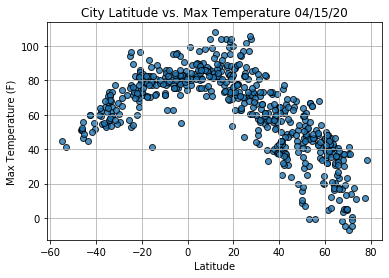

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

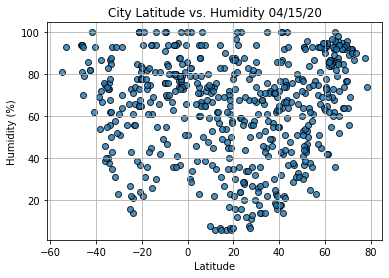

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

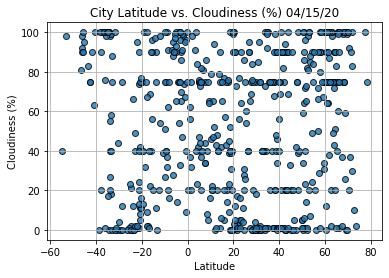

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()